# WeatherPy
----

#### Analysis

* Temperature appears to have a strong correlation with latitude
* The weather becomes significantly warmer as one approaches the equator, as expected. 
* There isn't a strong relationship between latitude and cloudiness.
* There isn't a strong relationship between latitude and wind speed. 
* Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude.
* There is no strong relationship between latitude and humidity, but there appears to be a slightly larger cluster of northern hemisphere cities with high humidity.


In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-100, 100)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | deputatskiy
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | lata
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | thinadhoo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | bud
Processing Record 15 of Set 1 | berekum
Processing Record 16 of Set 1 | fort morgan
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | raudeberg
Processing Record 20 of Set 1 | bad salzungen
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 1 | laredo
Processing Record 24 of Set 1 | pochutla
Processing 

Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | misratah
Processing Record 41 of Set 4 | ulaanbaatar
City not found. Skipping...
Processing Record 42 of Set 4 | fomboni
City not found. Skipping...
Processing Record 43 of Set 4 | mizdah
Processing Record 44 of Set 4 | moree
Processing Record 45 of Set 4 | mys shmidta
Processing Record 46 of Set 4 | yurecuaro
Processing Record 47 of Set 4 | mae hong son
Processing Record 48 of Set 4 | aksu
Processing Record 49 of Set 4 | khatanga
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | port-cartier
Processing Record 3 of Set 5 | morondava
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | waslala
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | mabaruma
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | taltal
Processing Record 12 o

Processing Record 27 of Set 8 | yenagoa
Processing Record 28 of Set 8 | moron
Processing Record 29 of Set 8 | kapustin yar
City not found. Skipping...
Processing Record 30 of Set 8 | davenda
Processing Record 31 of Set 8 | nhulunbuy
Processing Record 32 of Set 8 | hay river
Processing Record 33 of Set 8 | rayong
Processing Record 34 of Set 8 | san matias
Processing Record 35 of Set 8 | ornskoldsvik
Processing Record 36 of Set 8 | teguldet
Processing Record 37 of Set 8 | novopokrovka
Processing Record 38 of Set 8 | kargasok
Processing Record 39 of Set 8 | wilmington
Processing Record 40 of Set 8 | adrar
Processing Record 41 of Set 8 | astara
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | lima
Processing Record 44 of Set 8 | bhadra
Processing Record 45 of Set 8 | esil
Processing Record 46 of Set 8 | fatehpur
Processing Record 47 of Set 8 | bagotville
Processing Record 48 of Set 8 | acapulco
Processing Record 49 of Set 8 | estelle
Processing Record 1 of Set 9 | mou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [33]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

# display the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,deputatskiy,0,RU,1570423427,93,69.30,139.90,7.26,2.06
1,chokurdakh,100,RU,1570423275,88,70.62,147.90,19.34,7.52
2,mar del plata,47,CN,1570423267,46,29.86,90.73,46.61,6.31
3,albany,90,US,1570423264,82,42.65,-73.75,66.20,10.29
4,bambous virieux,40,MU,1570423347,83,-20.26,57.41,77.00,16.11


In [34]:
# output data to csv
weather_dataframe.to_csv(output_data_file)
#output_data_file

In [35]:
weather_dataframe.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

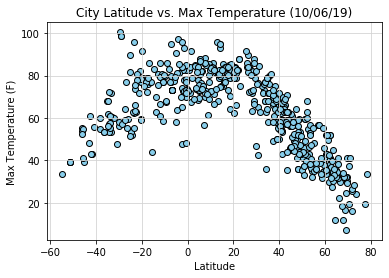

In [36]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

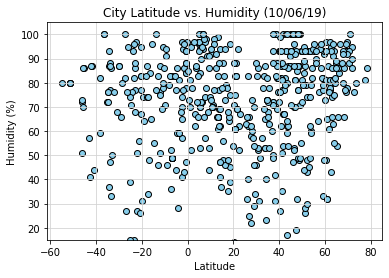

In [37]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

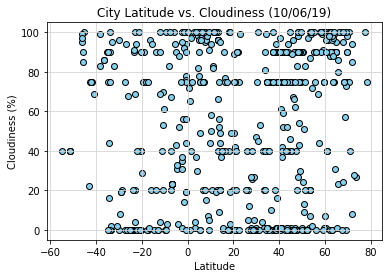

In [38]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

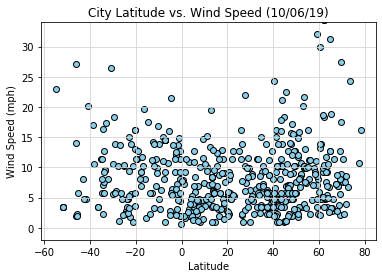

In [39]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Figures/fig4.png")
plt.show()